# <center>Medical Insurance Prediction</center>

<b>Problem: </b> Can you accurately predict insurance costs?

<b> Content Of the Dataset </b>

- age: age of primary beneficiary.

- sex: insurance contractor gender, female, male.

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height.

- children: Number of children covered by health insurance / Number of dependents.

- smoker

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance.

<b> We have to Build a Model such That, it correctly predicts the 'charges' using the rest of the features(columns) of Insurance Data </b>

<b>Link to the Dataset: </b> : https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

# Importing Libraries and Dataset

In [1]:
# Libraries for Analysis
import numpy as np 
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
Insurance_df = pd.read_csv('insurance.csv')

Insurance_df.head()          # Top 5 rows of dataset         

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
Insurance_df.shape    # Looking at the shape.

(1338, 7)

In [4]:
Insurance_df.info()    # Looking at the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 - <font> There are 1338 rows in the data set</font>
 - <font> There are 7 columns in the data set provided</font>

In [5]:
Insurance_df.isnull().sum() # Check for Null Values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
Insurance_df.isnull().sum().sum()

0

 We See above, There is no null values in the dataset

In [7]:
Insurance_df.describe()  # looking at the statistical information of the dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis

<b> Plotting Features Frequency Distribution </b>

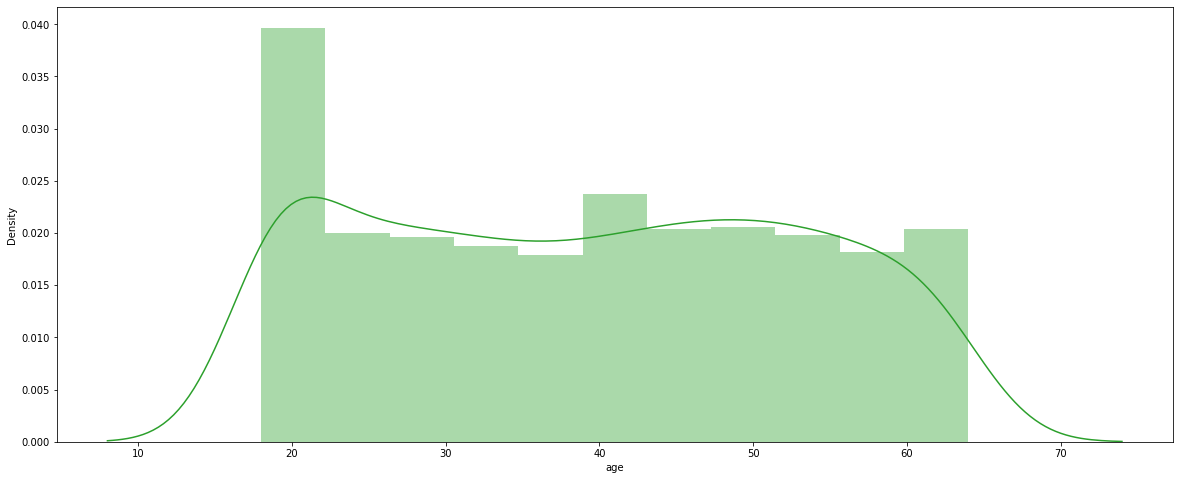

In [8]:
plt.figure(figsize=(20,8))
color = sns.color_palette()[2]
sns.distplot(Insurance_df['age'],color=color)
plt.show()

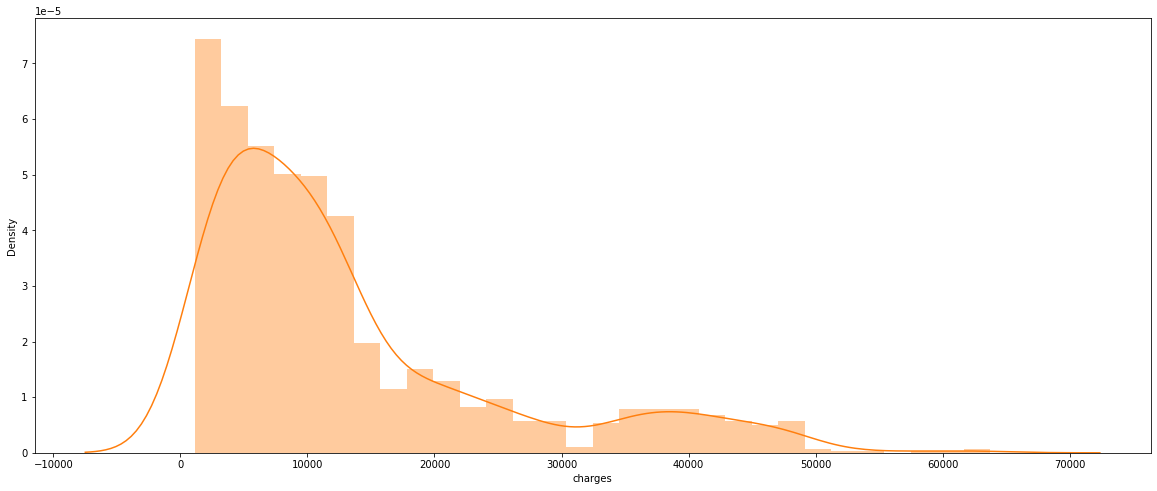

In [9]:
plt.figure(figsize=(20,8))
color = sns.color_palette()[1]
sns.distplot(Insurance_df['charges'],color=color)
plt.show()

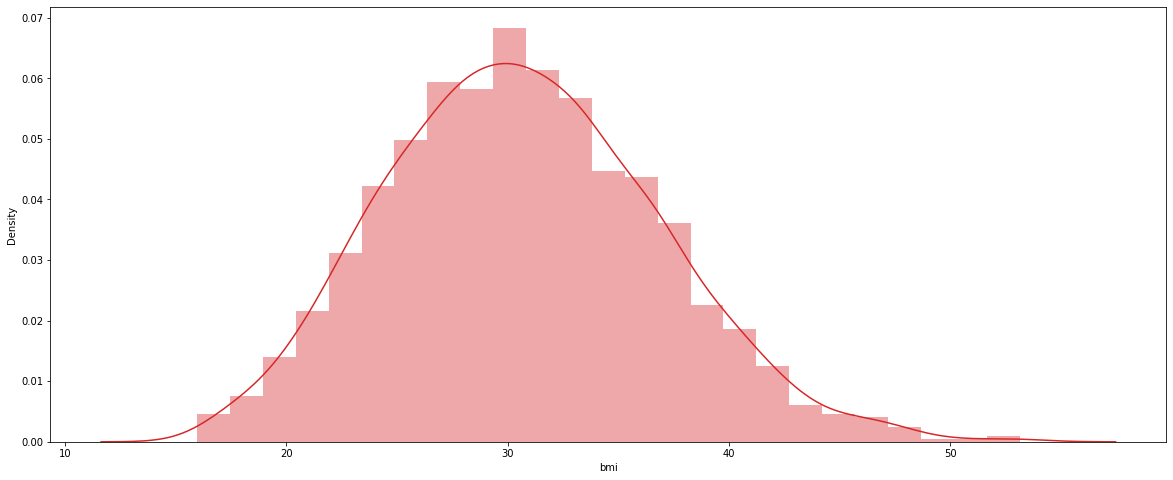

In [10]:
plt.figure(figsize=(20,8))
color = sns.color_palette()[3]
sns.distplot(Insurance_df[ 'bmi'],color=color)
plt.show()

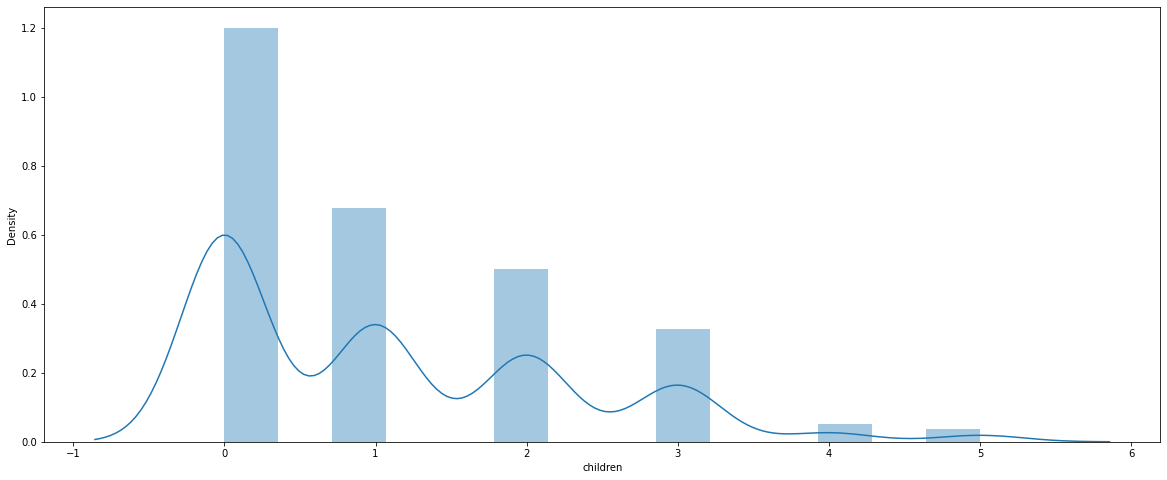

In [11]:
plt.figure(figsize=(20,8))
color = sns.color_palette()[0]
sns.distplot(Insurance_df['children'],color=color)
plt.show()

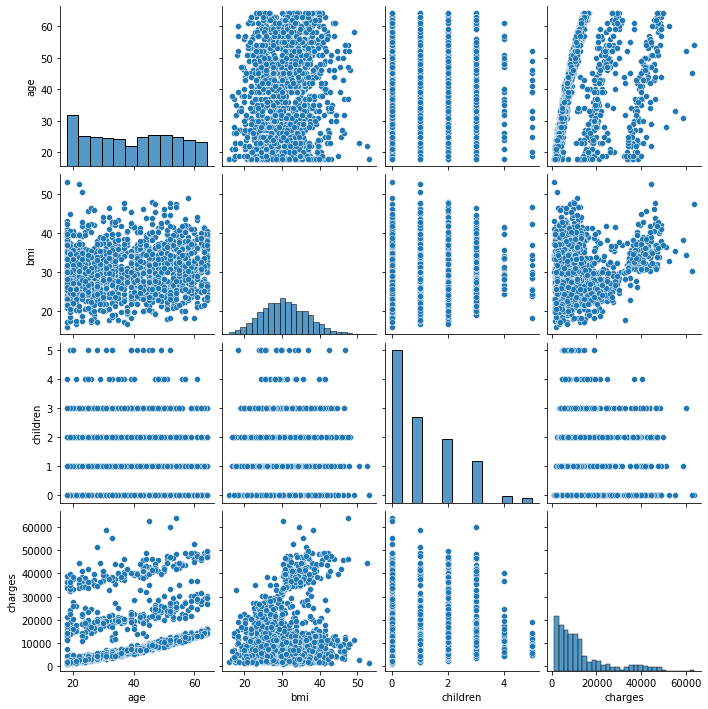

In [12]:
sns.pairplot(Insurance_df)

<b> Plotting Categorical Features </b>

male      676
female    662
Name: sex, dtype: int64


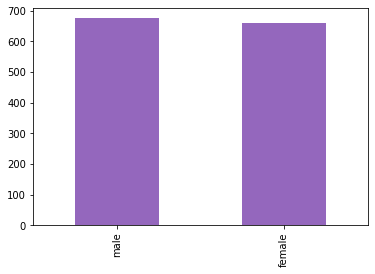

In [13]:
color = sns.color_palette()[4]
Insurance_df['sex'].value_counts().plot.bar(color=color)
print(Insurance_df['sex'].value_counts())       

no     1064
yes     274
Name: smoker, dtype: int64


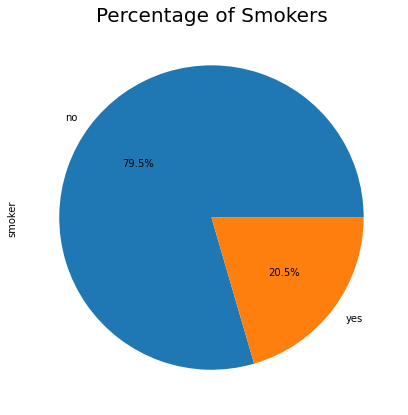

In [14]:
Insurance_df['smoker'].value_counts().plot(kind='pie',figsize=(12,7),autopct='%1.1f%%')
plt.title('Percentage of Smokers', fontsize=20)
print(Insurance_df['smoker'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


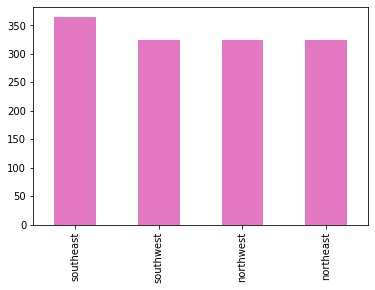

In [15]:
color = sns.color_palette()[6]
Insurance_df['region'].value_counts().plot.bar(color=color)
print(Insurance_df['region'].value_counts()) 

- Let's see the effect of smoking on insurance costs according to the gender  -

<AxesSubplot:xlabel='smoker', ylabel='charges'>

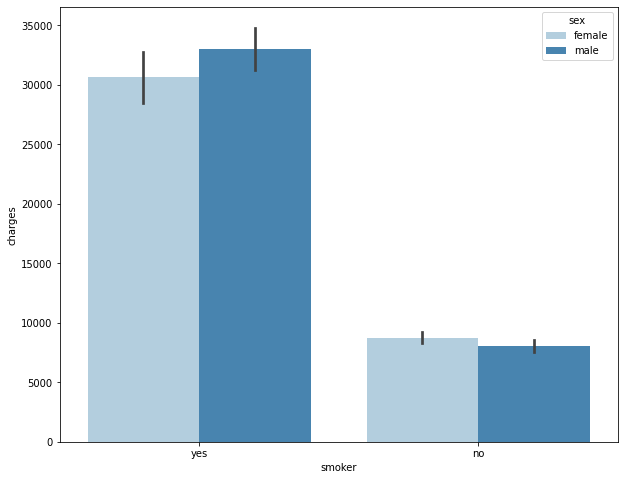

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(data=Insurance_df,y='charges', x = 'smoker', hue = 'sex',palette='Blues')

- Its clear from the above visualisation, that there are no apparent difference between men and women, Insuarance Costs are higher for smokers.

<AxesSubplot:xlabel='region', ylabel='charges'>

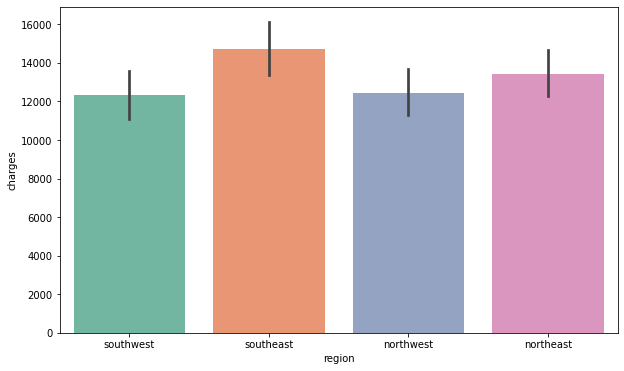

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='region', y='charges', data=Insurance_df, palette='Set2')

- families living in Southeast region have higher insurance costs than others.

<AxesSubplot:xlabel='children', ylabel='charges'>

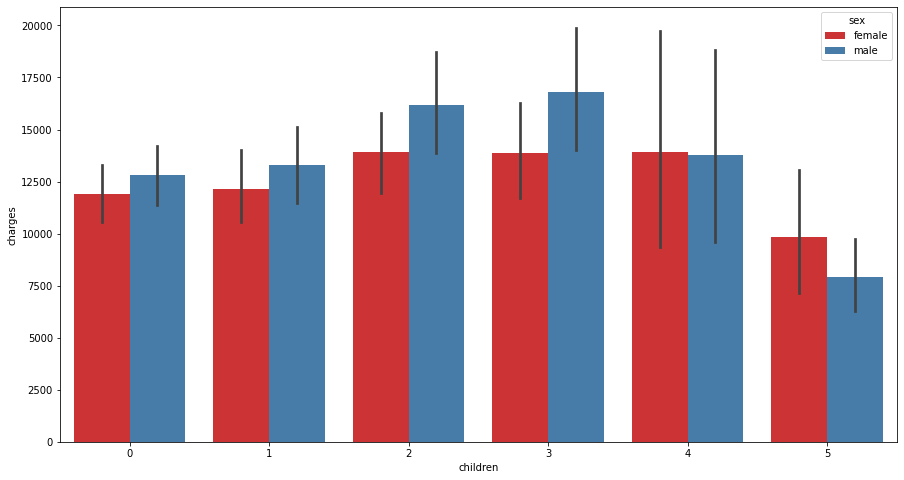

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(data=Insurance_df,y='charges', x = 'children', hue = 'sex',palette='Set1')

- From the above visualisation, it is noticable costs of families with 5 children are lower.

# Featuring Engineering

<b> Encoding </b>

- Handling Categorical Variables('sex','smoker','region') using Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
Insurance_df['sex'] = le.fit_transform(Insurance_df['sex'])
Insurance_df['smoker'] = le.fit_transform(Insurance_df['smoker'])
Insurance_df['region'] = le.fit_transform(Insurance_df['region'])

In [21]:
Insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<b> Check for multi-collinearity </b>

<AxesSubplot:>

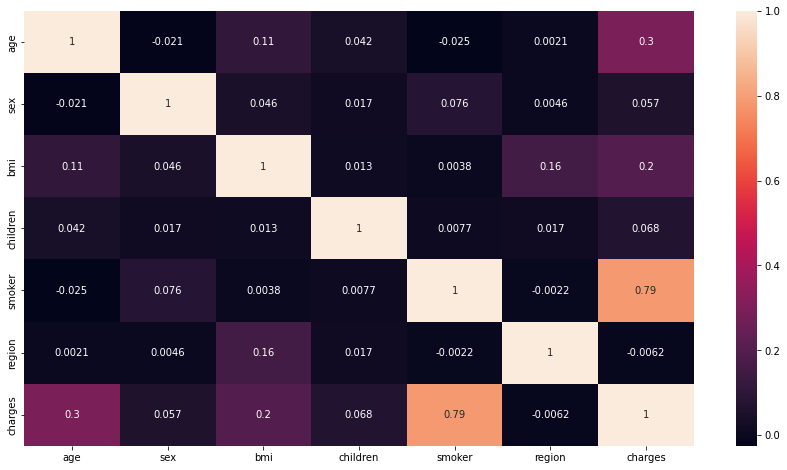

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(Insurance_df.corr(),annot=True) 

- When we look at the correlations of the variables, it is seen that the linear correlation with the smoker variable is quite high and the region variable is quite low .

# Modelling

# (i) Using Linear Regression 

In [23]:
x = Insurance_df.drop(columns=["charges"])
y = Insurance_df["charges"]

In [24]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

<b> Model Evaluation </b>

In [26]:
for i in range(10):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = i)
    model = LinearRegression()
    model.fit(x_train,y_train)
    resultfor_train= model.score(x_train,y_train)
    resultfor_test=model.score(x_test,y_test)
    
print('Result For Training set',np.average(resultfor_train))
print('-----')
print('Result For Testing set',np.average(resultfor_test))

Result For Training set 0.7440253259062533
-----
Result For Testing set 0.7778683760574732


<b> Checking The max accuracy of the model using Cross Validation </b>

In [27]:
from sklearn.model_selection import KFold,cross_val_score

In [28]:
k = KFold(5)
result = cross_val_score(model,x,y,cv = k)
print('Using Cross Validation We Get This Accuracy : ',max(result))

Using Cross Validation We Get This Accuracy :  0.7778677199788796


<b> Another Process To measure Accuracy of the model </b>

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
y_train_predict = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print('r2_score is', r2_score(y_train, y_train_predict))
print('------')
# on testing set
y_test_predict = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))
print('r2_score is', r2_score(y_test, y_test_predict))
print('------')

print('Theta for the features',model.coef_)
print('----')
print('Bias is',model.intercept_)

The model performance for training set
RMSE is 6151.44509699833
r2_score is 0.7440253259062533
------
The model performance for testing set
RMSE is 5604.014485986254
r2_score is 0.7778683760574732
------
Theta for the features [  256.66380016   -57.00666153   313.1908343    448.35925714
 23628.48258932  -300.10544541]
----
Bias is -11243.857312697748


Text(0, 0.5, 'Predicted')

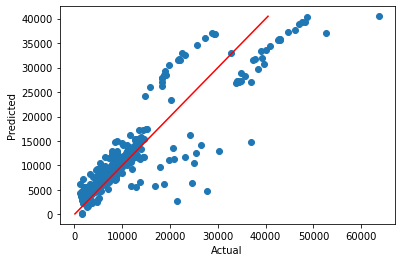

In [31]:
plt.scatter(y_test, y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)], color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')

<b> Residual Analysis </b>

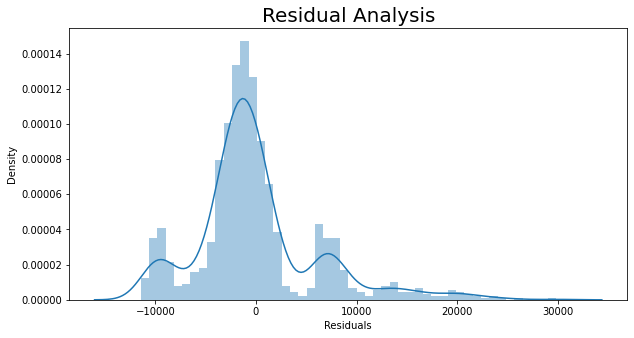

In [32]:
plt.figure(figsize=(10,5))
y_train_pred = model.predict(x_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

- From the above visualisation, We See that,The Residual terms are normally distributed.

<b> Insights </b>

- We see that , Using Linear Regression Model We don't actually get a high accurracy. Our root mean squared error(RMSE) was 5604.0144, quite high. 
- So we should to try to fit one another model to our data, let's see

# (ii) Using Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,n_estimators=1200)

In [34]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [35]:
y_pred_train_rf = rf.predict(x_train)

In [36]:
y_pred_test_rf = rf.predict(x_test)

In [37]:
print('r2 Score Of Training set', r2_score(y_train, y_pred_train_rf))

print('--')

print('r2 Score of Testing set', r2_score(y_test, y_pred_test_rf))


r2 Score Of Training set 0.8851745327213575
--
r2 Score of Testing set 0.8719140647458657


In [38]:
print ('Accuracy Of the Model :',r2_score(y_test, y_pred_test_rf))

Accuracy Of the Model : 0.8719140647458657


<b> We See that , Here In Random Forest Regression, Our Predicting Accuracy is 87% , that is , r2 Score is 0.8720 which is good for this dataset </b> 

# Conclusion

In [39]:
models = [('Linear Regression',r2_score(y_train, y_train_predict), r2_score(y_test, y_test_predict)),
          ('Random Forest Regression',r2_score(y_train, y_pred_train_rf), r2_score(y_test, y_pred_test_rf))]

In [40]:
Prediction = pd.DataFrame(data = models, columns=['Model', 'Training_Accuracy', 'Testing Accuracy'])

In [41]:
Prediction

,Model,Training_Accuracy,Testing Accuracy
0,Linear Regression,0.744025,0.777868
1,Random Forest Regression,0.885175,0.871914


<b> So, One may Use Random Forest Regression Model To Predict The Medical Insurance of the Families With a good accuracy </b>